In [90]:
from io import StringIO
from rdflib import Graph
from rdflib.tools.rdf2dot import rdf2dot
from graphviz.files import Source

In [91]:
rdf = """
PREFIX ex: <http://ex.example/#>
PREFIX inst: <http://example.com/users/>
PREFIX school: <http://school.example/#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>

inst:Alice foaf:age 13 ;                     
  ex:hasGuardian inst:Person2, inst:Person3 .

inst:Bob foaf:age 15 ;                       
  ex:hasGuardian inst:Person4 .  

inst:Claire foaf:age 12 ;                     
  ex:hasGuardian inst:Person5 .               

inst:Don foaf:age 14 . 

inst:Eric foaf:age 20 ;
  ex:hasGuardian inst:PersonA, inst:PersonB, inst:PersonC .
"""

In [100]:
class rdf_as_png:
    def __init__(self, rdf=None, url: str=None, g: Graph=None):
        if not g:
            self.g = Graph()
        if rdf:
            self.g.parse(data=rdf, format="turtle")
        if url:
            self.g.load(url, format="turtle")
        
    def _repr_svg_(self):
        dot_file = StringIO()
        rdf2dot(self.g, dot_file, opts={})
        return Source(dot_file.getvalue())._repr_svg_()

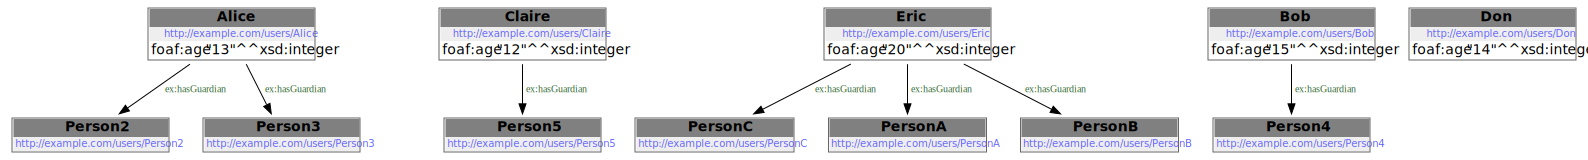

In [98]:
rdf_as_png(rdf)

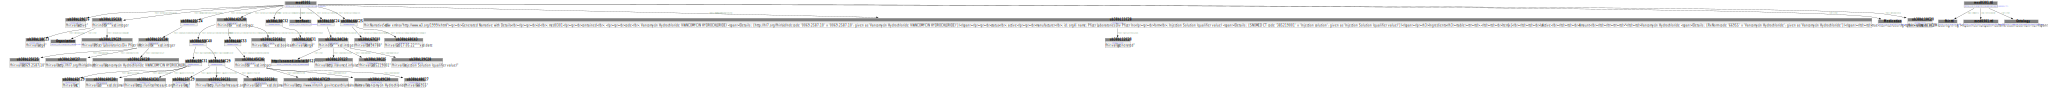

In [101]:
rdf_as_png(url="http://build.fhir.org/medicationexample0301.ttl")